In [28]:
from selenium import webdriver
from time import sleep
import re
import pandas as pd

In [2]:
try:
    d
except:
    d = webdriver.Firefox()

In [210]:
d.get('http://localhost:5502/docs/network/')

In [211]:
def get_current_minDegree(d):
    content = d.execute_script('return minDegree_label.textContent')
    try:
        pass
    except:
        return -1
    return int(re.search(r'(\d+)', content).groups()[0])

def get_current_minWeight(d):
    content = d.execute_script('return minWeight_label.textContent')
    try:
        pass
    except:
        return -1
    return int(re.search(r'(\d+)', content).groups()[0])

def get_num_communities(d):
    return list(set([int(x.text) for x in d.find_elements_by_class_name('numCommunities') if x.text]))[0]

def set_to(d, minDegree, minWeight):
    current_minDegree = get_current_minDegree(d)
    while not current_minDegree == minDegree:
        command = f'window.changeSetting("#minDegree", {minDegree});'
        d.execute_script(command)
        sleep(1)
        current_minDegree = get_current_minDegree(d)
        print(f'current minDegree: {current_minDegree}, reaching for: {minDegree} ({command})')
        
    current_minWeight = get_current_minWeight(d)
    while not current_minWeight ==  minWeight:
        d.execute_script(f'window.changeSetting("#minWeight", {minWeight});')
        sleep(1)
        current_minWeight = get_current_minWeight(d)
        print(f'current minWeight: {current_minWeight}, reaching for: {minWeight}')

    return current_minDegree, current_minWeight

In [212]:
degrees = [x for x in range(0,51)]
weights = [x for x in range(0,51)]
communities = {}
df = pd.DataFrame(columns=[f'weight-{x}' for x in sorted(weights)], index=[f'degree-{x}' for x in sorted(degrees)])

In [213]:
for degree in degrees:
    for weight in weights:
        set_to(d, degree, weight)
        communities[degree, weight] = get_num_communities(d)

current minDegree: 8, reaching for: 0 (window.changeSetting("#minDegree", 0);)
current minDegree: 8, reaching for: 0 (window.changeSetting("#minDegree", 0);)
current minDegree: 8, reaching for: 0 (window.changeSetting("#minDegree", 0);)
current minDegree: 8, reaching for: 0 (window.changeSetting("#minDegree", 0);)
current minDegree: 8, reaching for: 0 (window.changeSetting("#minDegree", 0);)
current minDegree: 8, reaching for: 0 (window.changeSetting("#minDegree", 0);)
current minDegree: 8, reaching for: 0 (window.changeSetting("#minDegree", 0);)
current minDegree: 8, reaching for: 0 (window.changeSetting("#minDegree", 0);)
current minDegree: 8, reaching for: 0 (window.changeSetting("#minDegree", 0);)
current minDegree: 8, reaching for: 0 (window.changeSetting("#minDegree", 0);)
current minDegree: 8, reaching for: 0 (window.changeSetting("#minDegree", 0);)
current minDegree: 8, reaching for: 0 (window.changeSetting("#minDegree", 0);)
current minDegree: 8, reaching for: 0 (window.change

current minWeight: 41, reaching for: 41
current minWeight: 42, reaching for: 42
current minWeight: 43, reaching for: 43
current minWeight: 44, reaching for: 44
current minWeight: 45, reaching for: 45
current minWeight: 46, reaching for: 46
current minWeight: 47, reaching for: 47
current minWeight: 48, reaching for: 48
current minWeight: 49, reaching for: 49
current minWeight: 50, reaching for: 50
current minDegree: 3, reaching for: 3 (window.changeSetting("#minDegree", 3);)
current minWeight: 0, reaching for: 0
current minWeight: 1, reaching for: 1
current minWeight: 2, reaching for: 2
current minWeight: 3, reaching for: 3
current minWeight: 4, reaching for: 4
current minWeight: 5, reaching for: 5
current minWeight: 6, reaching for: 6
current minWeight: 7, reaching for: 7
current minWeight: 8, reaching for: 8
current minWeight: 9, reaching for: 9
current minWeight: 10, reaching for: 10
current minWeight: 11, reaching for: 11
current minWeight: 12, reaching for: 12
current minWeight: 13

current minWeight: 36, reaching for: 36
current minWeight: 37, reaching for: 37
current minWeight: 38, reaching for: 38
current minWeight: 39, reaching for: 39
current minWeight: 40, reaching for: 40
current minWeight: 41, reaching for: 41
current minWeight: 42, reaching for: 42
current minWeight: 43, reaching for: 43
current minWeight: 44, reaching for: 44
current minWeight: 45, reaching for: 45
current minWeight: 46, reaching for: 46
current minWeight: 47, reaching for: 47
current minWeight: 48, reaching for: 48
current minWeight: 49, reaching for: 49
current minWeight: 50, reaching for: 50
current minDegree: 7, reaching for: 7 (window.changeSetting("#minDegree", 7);)
current minWeight: 0, reaching for: 0
current minWeight: 1, reaching for: 1
current minWeight: 2, reaching for: 2
current minWeight: 3, reaching for: 3
current minWeight: 4, reaching for: 4
current minWeight: 5, reaching for: 5
current minWeight: 6, reaching for: 6
current minWeight: 7, reaching for: 7
current minWeight

current minWeight: 31, reaching for: 31
current minWeight: 32, reaching for: 32
current minWeight: 33, reaching for: 33
current minWeight: 34, reaching for: 34
current minWeight: 35, reaching for: 35
current minWeight: 36, reaching for: 36
current minWeight: 37, reaching for: 37
current minWeight: 38, reaching for: 38
current minWeight: 39, reaching for: 39
current minWeight: 40, reaching for: 40
current minWeight: 41, reaching for: 41
current minWeight: 42, reaching for: 42
current minWeight: 43, reaching for: 43
current minWeight: 44, reaching for: 44
current minWeight: 45, reaching for: 45
current minWeight: 46, reaching for: 46
current minWeight: 47, reaching for: 47
current minWeight: 48, reaching for: 48
current minWeight: 49, reaching for: 49
current minWeight: 50, reaching for: 50
current minDegree: 11, reaching for: 11 (window.changeSetting("#minDegree", 11);)
current minWeight: 0, reaching for: 0
current minWeight: 1, reaching for: 1
current minWeight: 2, reaching for: 2
curr

current minWeight: 26, reaching for: 26
current minWeight: 27, reaching for: 27
current minWeight: 28, reaching for: 28
current minWeight: 29, reaching for: 29
current minWeight: 30, reaching for: 30
current minWeight: 31, reaching for: 31
current minWeight: 32, reaching for: 32
current minWeight: 33, reaching for: 33
current minWeight: 34, reaching for: 34
current minWeight: 35, reaching for: 35
current minWeight: 36, reaching for: 36
current minWeight: 37, reaching for: 37
current minWeight: 38, reaching for: 38
current minWeight: 39, reaching for: 39
current minWeight: 40, reaching for: 40
current minWeight: 41, reaching for: 41
current minWeight: 42, reaching for: 42
current minWeight: 43, reaching for: 43
current minWeight: 44, reaching for: 44
current minWeight: 45, reaching for: 45
current minWeight: 46, reaching for: 46
current minWeight: 47, reaching for: 47
current minWeight: 48, reaching for: 48
current minWeight: 49, reaching for: 49
current minWeight: 50, reaching for: 50


current minWeight: 21, reaching for: 21
current minWeight: 22, reaching for: 22
current minWeight: 23, reaching for: 23
current minWeight: 24, reaching for: 24
current minWeight: 25, reaching for: 25
current minWeight: 26, reaching for: 26
current minWeight: 27, reaching for: 27
current minWeight: 28, reaching for: 28
current minWeight: 29, reaching for: 29
current minWeight: 30, reaching for: 30
current minWeight: 31, reaching for: 31
current minWeight: 32, reaching for: 32
current minWeight: 33, reaching for: 33
current minWeight: 34, reaching for: 34
current minWeight: 35, reaching for: 35
current minWeight: 36, reaching for: 36
current minWeight: 37, reaching for: 37
current minWeight: 38, reaching for: 38
current minWeight: 39, reaching for: 39
current minWeight: 40, reaching for: 40
current minWeight: 41, reaching for: 41
current minWeight: 42, reaching for: 42
current minWeight: 43, reaching for: 43
current minWeight: 44, reaching for: 44
current minWeight: 45, reaching for: 45


current minWeight: 16, reaching for: 16
current minWeight: 17, reaching for: 17
current minWeight: 18, reaching for: 18
current minWeight: 19, reaching for: 19
current minWeight: 20, reaching for: 20
current minWeight: 21, reaching for: 21
current minWeight: 22, reaching for: 22
current minWeight: 23, reaching for: 23
current minWeight: 24, reaching for: 24
current minWeight: 25, reaching for: 25
current minWeight: 26, reaching for: 26
current minWeight: 27, reaching for: 27
current minWeight: 28, reaching for: 28
current minWeight: 29, reaching for: 29
current minWeight: 30, reaching for: 30
current minWeight: 31, reaching for: 31
current minWeight: 32, reaching for: 32
current minWeight: 33, reaching for: 33
current minWeight: 34, reaching for: 34
current minWeight: 35, reaching for: 35
current minWeight: 36, reaching for: 36
current minWeight: 37, reaching for: 37
current minWeight: 38, reaching for: 38
current minWeight: 39, reaching for: 39
current minWeight: 40, reaching for: 40


current minWeight: 11, reaching for: 11
current minWeight: 12, reaching for: 12
current minWeight: 13, reaching for: 13
current minWeight: 14, reaching for: 14
current minWeight: 15, reaching for: 15
current minWeight: 16, reaching for: 16
current minWeight: 17, reaching for: 17
current minWeight: 18, reaching for: 18
current minWeight: 19, reaching for: 19
current minWeight: 20, reaching for: 20
current minWeight: 21, reaching for: 21
current minWeight: 22, reaching for: 22
current minWeight: 23, reaching for: 23
current minWeight: 24, reaching for: 24
current minWeight: 25, reaching for: 25
current minWeight: 26, reaching for: 26
current minWeight: 27, reaching for: 27
current minWeight: 28, reaching for: 28
current minWeight: 29, reaching for: 29
current minWeight: 30, reaching for: 30
current minWeight: 31, reaching for: 31
current minWeight: 32, reaching for: 32
current minWeight: 33, reaching for: 33
current minWeight: 34, reaching for: 34
current minWeight: 35, reaching for: 35


current minWeight: 6, reaching for: 6
current minWeight: 7, reaching for: 7
current minWeight: 8, reaching for: 8
current minWeight: 9, reaching for: 9
current minWeight: 10, reaching for: 10
current minWeight: 11, reaching for: 11
current minWeight: 12, reaching for: 12
current minWeight: 13, reaching for: 13
current minWeight: 14, reaching for: 14
current minWeight: 15, reaching for: 15
current minWeight: 16, reaching for: 16
current minWeight: 17, reaching for: 17
current minWeight: 18, reaching for: 18
current minWeight: 19, reaching for: 19
current minWeight: 20, reaching for: 20
current minWeight: 21, reaching for: 21
current minWeight: 22, reaching for: 22
current minWeight: 23, reaching for: 23
current minWeight: 24, reaching for: 24
current minWeight: 25, reaching for: 25
current minWeight: 26, reaching for: 26
current minWeight: 27, reaching for: 27
current minWeight: 28, reaching for: 28
current minWeight: 29, reaching for: 29
current minWeight: 30, reaching for: 30
current 

current minWeight: 1, reaching for: 1
current minWeight: 2, reaching for: 2
current minWeight: 3, reaching for: 3
current minWeight: 4, reaching for: 4
current minWeight: 5, reaching for: 5
current minWeight: 6, reaching for: 6
current minWeight: 7, reaching for: 7
current minWeight: 8, reaching for: 8
current minWeight: 9, reaching for: 9
current minWeight: 10, reaching for: 10
current minWeight: 11, reaching for: 11
current minWeight: 12, reaching for: 12
current minWeight: 13, reaching for: 13
current minWeight: 14, reaching for: 14
current minWeight: 15, reaching for: 15
current minWeight: 16, reaching for: 16
current minWeight: 17, reaching for: 17
current minWeight: 18, reaching for: 18
current minWeight: 19, reaching for: 19
current minWeight: 20, reaching for: 20
current minWeight: 21, reaching for: 21
current minWeight: 22, reaching for: 22
current minWeight: 23, reaching for: 23
current minWeight: 24, reaching for: 24
current minWeight: 25, reaching for: 25
current minWeight:

current minWeight: 49, reaching for: 49
current minWeight: 50, reaching for: 50
current minDegree: 38, reaching for: 38 (window.changeSetting("#minDegree", 38);)
current minWeight: 0, reaching for: 0
current minWeight: 1, reaching for: 1
current minWeight: 2, reaching for: 2
current minWeight: 3, reaching for: 3
current minWeight: 4, reaching for: 4
current minWeight: 5, reaching for: 5
current minWeight: 6, reaching for: 6
current minWeight: 7, reaching for: 7
current minWeight: 8, reaching for: 8
current minWeight: 9, reaching for: 9
current minWeight: 10, reaching for: 10
current minWeight: 11, reaching for: 11
current minWeight: 12, reaching for: 12
current minWeight: 13, reaching for: 13
current minWeight: 14, reaching for: 14
current minWeight: 15, reaching for: 15
current minWeight: 16, reaching for: 16
current minWeight: 17, reaching for: 17
current minWeight: 18, reaching for: 18
current minWeight: 19, reaching for: 19
current minWeight: 20, reaching for: 20
current minWeight:

current minWeight: 44, reaching for: 44
current minWeight: 45, reaching for: 45
current minWeight: 46, reaching for: 46
current minWeight: 47, reaching for: 47
current minWeight: 48, reaching for: 48
current minWeight: 49, reaching for: 49
current minWeight: 50, reaching for: 50
current minDegree: 42, reaching for: 42 (window.changeSetting("#minDegree", 42);)
current minWeight: 0, reaching for: 0
current minWeight: 1, reaching for: 1
current minWeight: 2, reaching for: 2
current minWeight: 3, reaching for: 3
current minWeight: 4, reaching for: 4
current minWeight: 5, reaching for: 5
current minWeight: 6, reaching for: 6
current minWeight: 7, reaching for: 7
current minWeight: 8, reaching for: 8
current minWeight: 9, reaching for: 9
current minWeight: 10, reaching for: 10
current minWeight: 11, reaching for: 11
current minWeight: 12, reaching for: 12
current minWeight: 13, reaching for: 13
current minWeight: 14, reaching for: 14
current minWeight: 15, reaching for: 15
current minWeight:

current minWeight: 39, reaching for: 39
current minWeight: 40, reaching for: 40
current minWeight: 41, reaching for: 41
current minWeight: 42, reaching for: 42
current minWeight: 43, reaching for: 43
current minWeight: 44, reaching for: 44
current minWeight: 45, reaching for: 45
current minWeight: 46, reaching for: 46
current minWeight: 47, reaching for: 47
current minWeight: 48, reaching for: 48
current minWeight: 49, reaching for: 49
current minWeight: 50, reaching for: 50
current minDegree: 46, reaching for: 46 (window.changeSetting("#minDegree", 46);)
current minWeight: 0, reaching for: 0
current minWeight: 1, reaching for: 1
current minWeight: 2, reaching for: 2
current minWeight: 3, reaching for: 3
current minWeight: 4, reaching for: 4
current minWeight: 5, reaching for: 5
current minWeight: 6, reaching for: 6
current minWeight: 7, reaching for: 7
current minWeight: 8, reaching for: 8
current minWeight: 9, reaching for: 9
current minWeight: 10, reaching for: 10
current minWeight:

current minWeight: 34, reaching for: 34
current minWeight: 35, reaching for: 35
current minWeight: 36, reaching for: 36
current minWeight: 37, reaching for: 37
current minWeight: 38, reaching for: 38
current minWeight: 39, reaching for: 39
current minWeight: 40, reaching for: 40
current minWeight: 41, reaching for: 41
current minWeight: 42, reaching for: 42
current minWeight: 43, reaching for: 43
current minWeight: 44, reaching for: 44
current minWeight: 45, reaching for: 45
current minWeight: 46, reaching for: 46
current minWeight: 47, reaching for: 47
current minWeight: 48, reaching for: 48
current minWeight: 49, reaching for: 49
current minWeight: 50, reaching for: 50
current minDegree: 50, reaching for: 50 (window.changeSetting("#minDegree", 50);)
current minWeight: 0, reaching for: 0
current minWeight: 1, reaching for: 1
current minWeight: 2, reaching for: 2
current minWeight: 3, reaching for: 3
current minWeight: 4, reaching for: 4
current minWeight: 5, reaching for: 5
current mi

In [214]:
for degree, weight in communities.keys():
    df.loc[f'degree-{degree}',f'weight-{weight}'] = communities[degree,weight] #index,columns
    
df

,weight-0,weight-1,weight-2,weight-3,weight-4,weight-5,weight-6,weight-7,weight-8,weight-9,...,weight-41,weight-42,weight-43,weight-44,weight-45,weight-46,weight-47,weight-48,weight-49,weight-50
degree-0,61,61,40,38,32,27,27,23,21,22,...,6,6,7,6,5,5,4,5,5,5
degree-1,58,58,39,36,31,28,27,23,22,21,...,5,6,7,6,5,5,4,5,5,5
degree-2,49,49,37,35,31,28,27,23,22,21,...,5,6,7,6,5,5,4,5,5,5
degree-3,45,45,37,35,31,28,27,23,22,21,...,5,6,7,6,5,5,4,5,5,5
degree-4,35,35,32,33,29,28,27,23,22,21,...,5,6,7,6,5,5,4,5,5,5
degree-5,31,31,29,31,27,26,26,22,21,21,...,5,6,7,6,5,5,4,5,5,5
degree-6,27,27,27,29,27,24,25,21,20,20,...,5,6,7,6,5,5,4,5,5,5
degree-7,24,24,23,26,25,21,22,19,19,19,...,5,5,5,4,5,5,4,5,5,5
degree-8,21,21,20,22,23,20,21,18,18,18,...,5,5,5,4,5,5,4,5,5,5
degree-9,20,20,18,19,21,18,19,17,17,17,...,5,5,5,4,5,5,4,5,5,5


In [227]:
data = df.to_json()

In [229]:
with open('../network-app/data/v1-14-days-filtered-node-weight-distributions.json', 'w+') as f:
    f.write(data)

<AxesSubplot:>

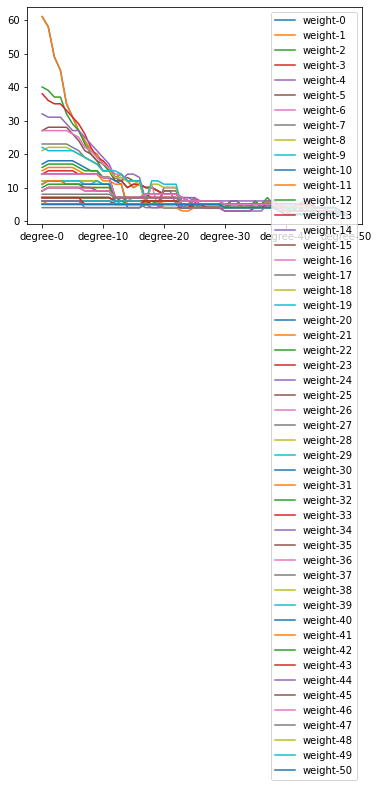

In [230]:
df.plot()

In [239]:
communities_data = []
for degree, row in df.iterrows():
    
    datapoint = dict(row)
    datapoint["name"] = degree.replace('degree-', 'min-degree-')    
    
    communities_data.append(datapoint)

In [243]:
import json

with open('../network-app/data/v1-14-days-filtered-node-weight-distributions.json', 'w+') as f:
    f.write(json.dumps(communities_data))